In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import dtale
import ipyvizzu as vz
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

/Users/raghad/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
jobs_data = pd.read_csv("Data/Jadarat_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3]:
jobs_data.shape

(1470, 18)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [4]:
jobs_data.shape

(1470, 18)

In [5]:
jobs_data.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

In [6]:
dtale.show(jobs_data)

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

The data source is Keggle and i trust the data source

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

The Data from 2023 and it is the time period thet i will work with

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


 All data from the same data source so it is consistent

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: The data sample aligns with my analysis objectives.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, I get rid of these using the drop() method.



In [7]:
jobs_data.drop(columns=['job_tasks', 'job_desc'], inplace=True)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [ ]:
# Chaeck the rows duplicate
dtale.show(jobs_data[jobs_data.duplicated(keep=False)])

In [14]:
# after cleaning
dtale.show(jobs_data[jobs_data.duplicated(keep=False)])

In [ ]:
# Chaeck the duplicate on job id
dtale.show(jobs_data[jobs_data['job_post_id'].duplicated(keep=False)])

In [10]:
jobs_data[jobs_data['job_post_id'] == 20202026375465]

,job_title,job_date,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
868,أخصائي علاج طبيعي,05/06/1444,مركز سكاكا الجوف للحجامة,25-1952621,خاص,صغيرة فئة أ,مراكز الطب البديل والتكميلي,NaN,الجوف,SAKAKA...,"['Salary', '5000.0']",دوام كامل,0 / 2,20202026375465,0 Years,both
912,أخصائي علاج طبيعي,Publish date,مركز سكاكا الجوف للحجامة,25-1952621,خاص,صغيرة فئة أ,مراكز الطب البديل والتكميلي,NaN,الجوف,SAKAKA...,"['Salary', '5000.0']",دوام كامل,0 / 2,20202026375465,0 Years,both
1153,أخصائي علاج طبيعي,05/06/1444,مركز سكاكا الجوف للحجامة,25-1952621,خاص,صغيرة فئة ب,مراكز الطب البديل والتكميلي,NaN,الجوف,SAKAKA...,"['Salary', '5000.0']",دوام كامل,0 / 2,20202026375465,0 Years,both


In [11]:
jobs_data['job_post_id'].duplicated().value_counts()

job_post_id
False    1381
True       89
Name: count, dtype: int64

In [15]:
#after clean 
dtale.show(jobs_data[jobs_data['job_post_id'].duplicated(keep=False)])

In [16]:
jobs_data[jobs_data['job_post_id'] == 20202026375465]

,job_title,job_date,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
868,أخصائي علاج طبيعي,05/06/1444,مركز سكاكا الجوف للحجامة,25-1952621,خاص,صغيرة فئة أ,مراكز الطب البديل والتكميلي,NaN,الجوف,SAKAKA...,"['Salary', '5000.0']",دوام كامل,0 / 2,20202026375465,0 Years,both


In [17]:
jobs_data['job_post_id'].duplicated().value_counts()

job_post_id
False    1381
Name: count, dtype: int64

In [16]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [18]:
#Display number missing values per column
jobs_data.isnull().sum().sort_values(ascending= False)

qualif          649
eco_activity     72
comp_size        14
job_title         0
job_date          0
comp_name         0
comp_no           0
comp_type         0
region            0
city              0
benefits          0
contract          0
positions         0
job_post_id       0
exper             0
gender            0
dtype: int64

In [22]:
# after cleaning
jobs_data.isnull().sum().sort_values(ascending= False)

job_title       0
job_date        0
comp_name       0
comp_no         0
comp_type       0
comp_size       0
eco_activity    0
qualif          0
region          0
city            0
benefits        0
contract        0
positions       0
job_post_id     0
exper           0
gender          0
dtype: int64

In [ ]:
# Check if there is - or space
typo_wrong = (jobs_data.notna()) & (jobs_data != '-') & (jobs_data != ' ')
typo_wrong.sum(axis=0)

job_title       1381
job_date        1381
comp_name       1381
comp_no         1381
comp_type       1381
comp_size       1381
eco_activity    1381
qualif          1381
region          1381
city            1381
benefits        1381
contract        1381
positions       1381
job_post_id     1381
exper           1381
gender          1381
dtype: int64

In [20]:
# Now all data are completed

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [24]:
# check columns types 
jobs_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1381 entries, 0 to 1468
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1381 non-null   object
 1   job_date      1381 non-null   object
 2   comp_name     1381 non-null   object
 3   comp_no       1381 non-null   object
 4   comp_type     1381 non-null   object
 5   comp_size     1381 non-null   object
 6   eco_activity  1381 non-null   object
 7   qualif        1381 non-null   object
 8   region        1381 non-null   object
 9   city          1381 non-null   object
 10  benefits      1381 non-null   object
 11  contract      1381 non-null   object
 12  positions     1381 non-null   object
 13  job_post_id   1381 non-null   int64 
 14  exper         1381 non-null   object
 15  gender        1381 non-null   object
dtypes: int64(1), object(15)
memory usage: 183.4+ KB


In [22]:
# No change the value format

In [25]:
dtale.show(jobs_data['gender']) 
# updete the format

In [32]:
dtale.show(jobs_data['gender']) 
# after the update

In [26]:
dtale.show(jobs_data['benefits'])

In [ ]:
# After adding new colume for Salary from benefits coluume
dtale.show(jobs_data['Salary'])

In [27]:
jobs_data['exper'].value_counts()
# I want the experince in numbers

exper
0 Years     780
2 Years     412
4 Years     143
7 Years      29
10 Years     14
12 Years      3
Name: count, dtype: int64

In [ ]:
#Aftre clean the experince and rename the colume to experience in years
jobs_data['experience in years'].value_counts()

experience in years
0     780
2     412
4     143
7      29
10     14
12      3
Name: count, dtype: int64

In [ ]:
# go to clean them 

In [ ]:
# check outliers 

In [35]:
jobs_data.columns

Index(['job_title', 'job_date', 'comp_name', 'comp_no', 'comp_type',
       'comp_size', 'eco_activity', 'qualif', 'region', 'city', 'benefits',
       'contract', 'positions', 'job_post_id', 'experience in years', 'gender',
       'Salary'],
      dtype='object')

## Check outliers

2025-02-19 18:34:57,846 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-19 18:34:57,848 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


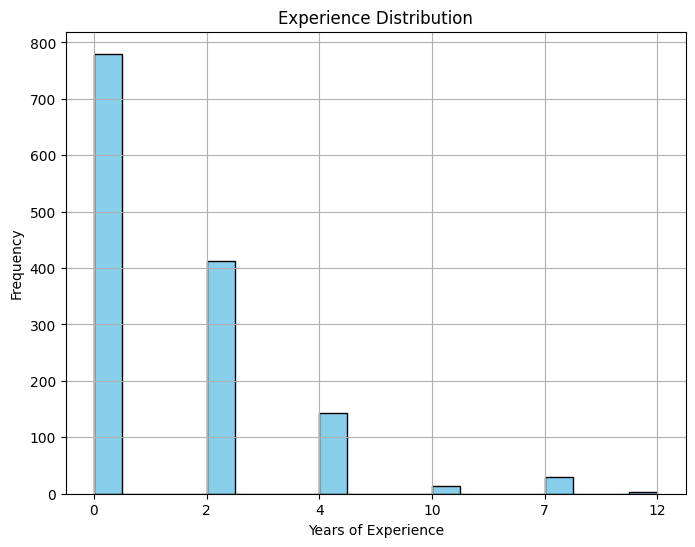

In [ ]:
#Check outliers on experience
# Create a histogram for the 'exper' column (assuming it contains numerical data)
plt.figure(figsize=(8, 6))
plt.hist(jobs_data['experience in years'], bins=20, edgecolor='black', color='skyblue')
plt.title('Experience Distribution')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# Natural outliers

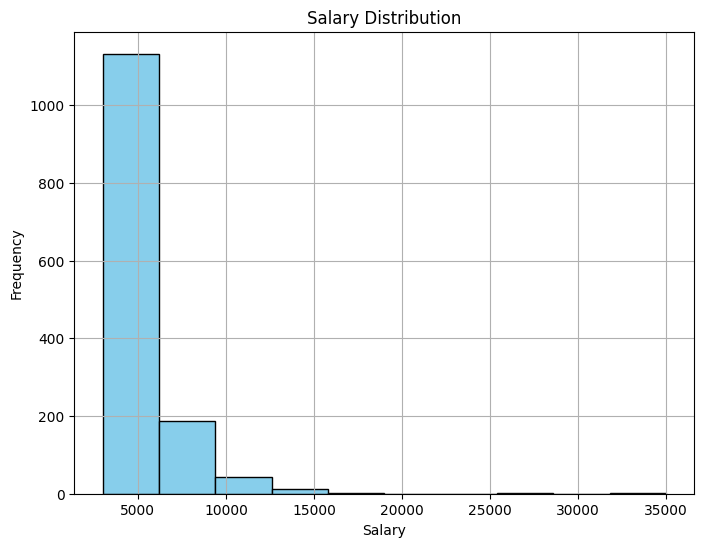

In [ ]:
#Check outliers on Salary

# Convert the 'Salary' column to numeric (if it's not already)
jobs_data['Salary'] = pd.to_numeric(jobs_data['Salary'], errors='coerce')

# Now plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(jobs_data['Salary'].dropna(), bins=10, edgecolor='black', color='skyblue')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# Natural outliers

2025-02-19 18:35:02,816 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-19 18:35:02,823 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


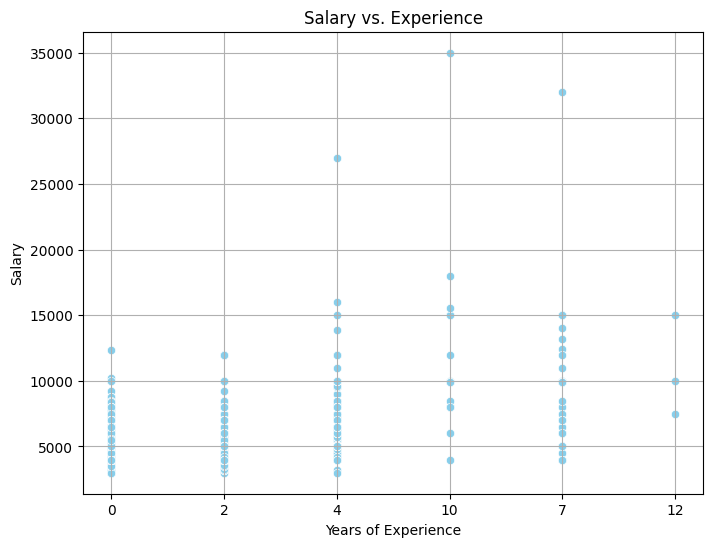

In [ ]:
#Check outliers on Salary and Experience

# Create a scatter plot to show the relationship between Salary and Experience
plt.figure(figsize=(8, 6))
sns.scatterplot(x=jobs_data['experience in years'], y=jobs_data['Salary'], color='skyblue')
plt.title('Salary vs. Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()
# Natural outliers

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [ ]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [ ]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [ ]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [ ]:
# Cleane rows duplicat
jobs_data.drop_duplicates(inplace=True)
jobs_data.duplicated().value_counts()

False    1469
Name: count, dtype: int64

In [ ]:
# Cleane duplicat on job post id 
jobs_data.drop_duplicates(subset='job_post_id', inplace=True)
jobs_data['job_post_id'].duplicated().value_counts()

job_post_id
False    1381
Name: count, dtype: int64

In [ ]:
# fill nulls on qualif
jobs_data['qualif'].fillna('Unknown',inplace=True)
jobs_data['qualif'].isnull().sum()

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43649/1929252999.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





np.int64(0)

In [ ]:
# fill nulls on eco_activity

jobs_data['eco_activity'].fillna('Unknown',inplace=True)
jobs_data['eco_activity'].isnull().sum()

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43649/3799258014.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





np.int64(0)

In [ ]:
# fill nulls on comp_size

jobs_data['comp_size'].fillna('Unknown',inplace=True)
jobs_data['comp_size'].isnull().sum()

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43649/2019968572.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





np.int64(0)

In [ ]:
# Fix the Format of gender
jobs_data['gender']=jobs_data['gender'].replace({'M': 'Male', 'F': 'Female', 'both': 'Both'})

In [ ]:
# add new colume for Salary from benefits
jobs_data['Salary'] = jobs_data['benefits'].apply(lambda x: eval(x)[1] if isinstance(x, str) else None)
jobs_data['Salary'].value_counts()

Salary
4000.0    527
5000.0    205
6000.0    123
4500.0    102
7000.0     83
         ... 
5599.0      1
4750.0      1
4320.0      1
5066.0      1
5556.0      1
Name: count, Length: 85, dtype: int64

In [30]:
jobs_data['exper'][50].split()[0]

'2'

In [31]:
#Split the exper
jobs_data['exper']=jobs_data['exper'].map(lambda x: x.split()[0])
jobs_data.rename(columns={'exper':'experience in years'},inplace=True)

In [ ]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [ ]:
#change data type

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

# Q1 What proportion of job postings is attributed to each region within the kingdom?

In [42]:
import pandas as pd
from ipyvizzu import Chart, Data, Config, Style, DisplayTarget


# Aggregate data by region
region_counts = jobs_data['region'].value_counts().reset_index()
region_counts.columns = ['region', 'count']

# Create the chart
chart = Chart(display=DisplayTarget.MANUAL)  # Set display target

# Add data to the chart
chart_data = Data()
chart_data.add_data_frame(region_counts)

chart.animate(chart_data)
chart.animate(Config({
    'x': 'count',
    'y': 'region',
    'label': 'count',
    'title': 'Proportion of Job Postings by Region'
}))
chart.animate(Style({'plot': {'marker': {'colorPalette': '#B0C4DE'}}}))

chart.show()


/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43649/488303240.py:14: DeprecationWarning:

'add_data_frame' is deprecated and will be removed in future versions. Use 'add_df' instead - see https://ipyvizzu.vizzuhq.com/0.17/reference/ipyvizzu/animation/#ipyvizzu.animation.Data.add_df



# Q2 Is there a gender preference indicated in the job postings?

In [46]:
# Aggregate data by gender
gender_counts = jobs_data['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

# Create the chart
chart = Chart(display=DisplayTarget.MANUAL)  # Set display target

# Add data to the chart
chart_data = Data()
chart_data.add_data_frame(gender_counts)

chart.animate(chart_data)
chart.animate(Config({
    'x': 'count',
    'y': 'gender',
    'label': 'count',
    'title': 'Gender Preference in Job Postings'
}))
chart.animate(Style({'plot': {'marker': {'colorPalette': '#FFA07A'}}}))

chart.show()

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43649/444837220.py:10: DeprecationWarning:

'add_data_frame' is deprecated and will be removed in future versions. Use 'add_df' instead - see https://ipyvizzu.vizzuhq.com/0.17/reference/ipyvizzu/animation/#ipyvizzu.animation.Data.add_df



# Q3 What is the expected salary range for fresh graduates?

In [40]:
fresh_graduates = jobs_data[jobs_data['experience in years'] == '0']

# Define salary bins based on your data range (3000 to 35000)
bins = [3000, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
labels = ['3K-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k']

# Create a categorical column and set the categories
fresh_graduates['SalaryRange'] = pd.cut(fresh_graduates['Salary'], bins=bins, labels=labels)

# Ensure the categories are ordered correctly
fresh_graduates['SalaryRange'] = fresh_graduates['SalaryRange'].cat.set_categories(labels, ordered=True)

# Aggregate data by SalaryRange to get counts
salary_range_counts = fresh_graduates['SalaryRange'].value_counts().reset_index()
salary_range_counts.columns = ['SalaryRange', 'count']

# Sort the data by SalaryRange for better visualization
salary_range_counts = salary_range_counts.sort_values('SalaryRange')

# Find the most common salary range (mode)
most_common_salary_range = salary_range_counts.loc[salary_range_counts['count'].idxmax()]

# Output the result
print(f"The most common salary range for fresh graduates is: {most_common_salary_range['SalaryRange']} with {most_common_salary_range['count']} job postings.")

The most common salary range for fresh graduates is: 3K-5k with 601 job postings.


/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_38937/22932124.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_38937/22932124.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_38937/686092149.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



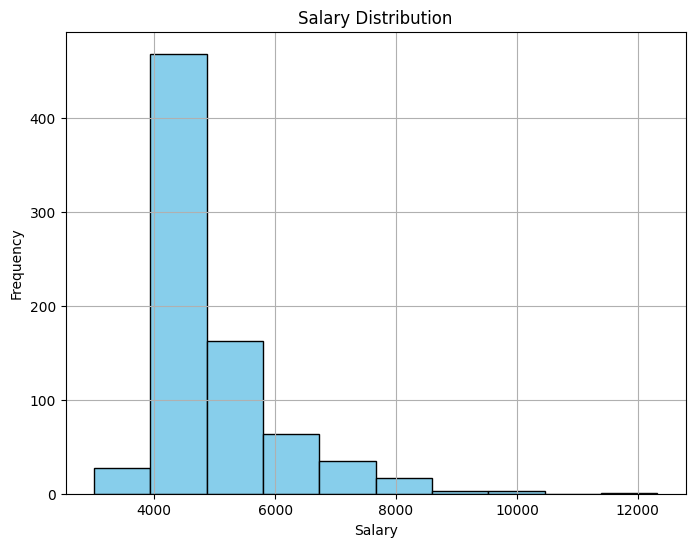

In [ ]:
fresh_graduates = jobs_data[jobs_data['experience in years'] == '0']
# Convert the 'Salary' column to numeric (if it's not already)
fresh_graduates['Salary'] = pd.to_numeric(jobs_data['Salary'], errors='coerce')

# Now plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(fresh_graduates['Salary'].dropna(), bins=10, edgecolor='black', color='skyblue')
plt.title('Salary Distribution for fresh graduates')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [47]:
fresh_graduates = jobs_data[jobs_data['experience in years'] == '0']
fresh_graduates['Salary'] = pd.to_numeric(fresh_graduates['Salary'], errors='coerce')
fresh_graduates = fresh_graduates.dropna(subset=['Salary'])

# Create a Data object from the DataFrame
data = Data()
data.add_df(fresh_graduates)

# Create a Chart object
chart = Chart(width="800px", height="600px", display=DisplayTarget.MANUAL)

# Add the data to the chart
chart.animate(data)

# Configure the chart to show a histogram of salaries
chart.animate(
    Config({
        "channels": {
            "x": {"set": ["Salary"]},
            "y": {"set": ["Count"]}
        },
        "title": "Salary Distribution for Fresh Graduates",
        "geometry": "rectangle"
    })
)

# Style the chart
chart.animate(
    Style({
        "plot": {
            "marker": {"colorPalette": "#B0C4DE"},
            "xAxis": {"label": {"angle": 0}},
            "yAxis": {"label": {"angle": 0}}
        }
    })
)

# Show the chart
chart.show()

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_38937/1999101935.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 4 Are job opportunities predominantly targeted at individuals with experience, or is there room for fresh graduates as well?

In [41]:
# Categorize data into 'Experienced' and 'Fresh Graduates'
jobs_data['experience_category'] = jobs_data['experience in years'].apply(lambda x: 'Experienced' if int(x) > 0 else 'Fresh Graduate')

# Aggregate data by experience category
experience_counts = jobs_data['experience_category'].value_counts().reset_index()
experience_counts.columns = ['experience_category', 'count']

# Create the chart
chart = Chart(display=DisplayTarget.MANUAL)  # Set display target

# Add data to the chart
chart_data = Data()
chart_data.add_data_frame(experience_counts)

chart.animate(chart_data)
chart.animate(Config({
    'x': 'count',
    'y': 'experience_category',
    'label': 'count',
    'title': 'Job Opportunities by Experience Level'
}))
chart.animate(Style({'plot': {'marker': {'colorPalette': '#ADD8E6'}}}))

chart.show()

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_38937/1717316107.py:13: DeprecationWarning:

'add_data_frame' is deprecated and will be removed in future versions. Use 'add_df' instead - see https://ipyvizzu.vizzuhq.com/0.17/reference/ipyvizzu/animation/#ipyvizzu.animation.Data.add_df



# storyTiling


# Q1 Is Riyadh the most advertising city about jobs?

In [44]:
# Aggregate data by region
region_counts = jobs_data['region'].value_counts().reset_index()
region_counts.columns = ['region', 'count']

# Create the chart
chart = Chart(display=DisplayTarget.MANUAL)  # Set display target

# Add data to the chart
chart_data = Data()
chart_data.add_data_frame(region_counts)

chart.animate(chart_data)
chart.animate(Config({
    'x': 'count',
    'y': 'region',
    'label': 'count',
    'title': 'Proportion of Job Postings by Region'
}))
chart.animate(Style({'plot': {'marker': {'colorPalette': '#B0C4DE'}}}))

chart.show()

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43649/1142290264.py:10: DeprecationWarning:

'add_data_frame' is deprecated and will be removed in future versions. Use 'add_df' instead - see https://ipyvizzu.vizzuhq.com/0.17/reference/ipyvizzu/animation/#ipyvizzu.animation.Data.add_df



# Q2 Is there a gender discrimination in the jobs announced in Riyadh?

In [51]:
jobs_in_riyadh = jobs_data[jobs_data['region'] == 'الرياض']
# Aggregate data by gender
gender_counts = jobs_in_riyadh['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

# Create the chart
chart = Chart(display=DisplayTarget.MANUAL)  # Set display target

# Add data to the chart
chart_data = Data()
chart_data.add_data_frame(gender_counts)

chart.animate(chart_data)
chart.animate(Config({
    'x': 'count',
    'y': 'gender',
    'label': 'count',
    'title': 'Gender Preference in Job Postings'
}))
chart.animate(Style({'plot': {'marker': {'colorPalette': '#FFA07A'}}}))

chart.show()

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43649/3146105209.py:11: DeprecationWarning:

'add_data_frame' is deprecated and will be removed in future versions. Use 'add_df' instead - see https://ipyvizzu.vizzuhq.com/0.17/reference/ipyvizzu/animation/#ipyvizzu.animation.Data.add_df



# Q3 Do the parties in Riyadh prefer experienced or newly graduated?

In [53]:
# Categorize data into 'Experienced' and 'Fresh Graduates'
jobs_in_riyadh['experience_category'] = jobs_in_riyadh['experience in years'].apply(lambda x: 'Experienced' if int(x) > 0 else 'Fresh Graduate')

# Aggregate data by experience category
experience_counts = jobs_in_riyadh['experience_category'].value_counts().reset_index()
experience_counts.columns = ['experience_category', 'count']

# Create the chart
chart = Chart(display=DisplayTarget.MANUAL)  # Set display target

# Add data to the chart
chart_data = Data()
chart_data.add_data_frame(experience_counts)

chart.animate(chart_data)
chart.animate(Config({
    'x': 'count',
    'y': 'experience_category',
    'label': 'count',
    'title': 'Job Opportunities by Experience Level'
}))
chart.animate(Style({'plot': {'marker': {'colorPalette': '#ADD8E6'}}}))

chart.show()

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43649/3007109192.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43649/3007109192.py:13: DeprecationWarning:

'add_data_frame' is deprecated and will be removed in future versions. Use 'add_df' instead - see https://ipyvizzu.vizzuhq.com/0.17/reference/ipyvizzu/animation/#ipyvizzu.animation.Data.add_df



# Q4 What is the rnge of new graduation salaries in Riyadh?

In [54]:
fresh_graduates = jobs_in_riyadh[jobs_in_riyadh['experience in years'] == '0']
fresh_graduates['Salary'] = pd.to_numeric(fresh_graduates['Salary'], errors='coerce')
fresh_graduates = fresh_graduates.dropna(subset=['Salary'])

# Create a Data object from the DataFrame
data = Data()
data.add_df(fresh_graduates)

# Create a Chart object
chart = Chart(width="800px", height="600px", display=DisplayTarget.MANUAL)

# Add the data to the chart
chart.animate(data)

# Configure the chart to show a histogram of salaries
chart.animate(
    Config({
        "channels": {
            "x": {"set": ["Salary"]},
            "y": {"set": ["Count"]}
        },
        "title": "Salary Distribution for Fresh Graduates",
        "geometry": "rectangle"
    })
)

# Style the chart
chart.animate(
    Style({
        "plot": {
            "marker": {"colorPalette": "#B0C4DE"},
            "xAxis": {"label": {"angle": 0}},
            "yAxis": {"label": {"angle": 0}}
        }
    })
)

# Show the chart
chart.show()

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43649/1545642338.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43649/1490007945.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



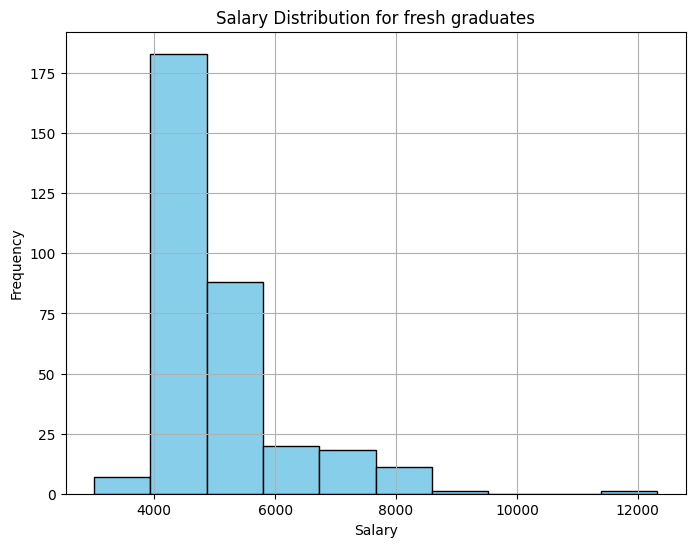

In [55]:
fresh_graduates = jobs_in_riyadh[jobs_in_riyadh['experience in years'] == '0']
# Convert the 'Salary' column to numeric (if it's not already)
fresh_graduates['Salary'] = pd.to_numeric(jobs_in_riyadh['Salary'], errors='coerce')

# Now plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(fresh_graduates['Salary'].dropna(), bins=10, edgecolor='black', color='skyblue')
plt.title('Salary Distribution for fresh graduates')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
